> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[15 12]
 [ 8 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy: 0.5555555555555556


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [6]:
# 🔧 Add code here
X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]

### ✍️ Your Response: 🔧
1. The second model setup worked worse than the first model.

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='linear', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Confusion Matrix:
 [[20 18]
 [17 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53        38
           1       0.42      0.43      0.43        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [ ]:
# 🔧 Add code here:


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the C values to test
c_values = [1, 10]

for c in c_values:
    print(f"\n--- Training SVM with C = {c} ---")
    # Train SVM with the current C value
    svm_model = SVC(kernel='linear', C=c, gamma='scale')
    svm_model.fit(X_train_svm, y_train_svm)

    # Predict
    y_pred_svm = svm_model.predict(X_test_svm)

    # Evaluate
    print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
    print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
    print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


--- Training SVM with C = 1 ---
Confusion Matrix:
 [[20 18]
 [17 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53        38
           1       0.42      0.43      0.43        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588

--- Training SVM with C = 10 ---
Confusion Matrix:
 [[20 18]
 [15 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        38
           1       0.45      0.50      0.48        30

    accuracy                           0.51        68
   macro avg       0.51      0.51      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### ✍️ Your Response: 🔧
1. The tradeoff between having a higher or lower C is that the higher it goes the more accurate it could get but it has a chance to overfit with the higher the C goes, and underfit the lower the C goes.

2. The 10 C was slightly better than the 1 C value.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(12, activation='relu'), # New Layer
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4368 - loss: 0.7094 - val_accuracy: 0.5294 - val_loss: 0.6962
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4472 - loss: 0.7042 - val_accuracy: 0.5294 - val_loss: 0.6964
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5646 - loss: 0.6937 - val_accuracy: 0.5294 - val_loss: 0.6965
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5166 - loss: 0.6976 - val_accuracy: 0.4706 - val_loss: 0.6969
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5820 - loss: 0.6904 - val_accuracy: 0.4412 - val_loss: 0.6965
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5774 - loss: 0.6932 - val_accuracy: 0.4412 - val_loss: 0.6967
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6309 - loss: 0.6899 - val_accuracy: 0.4559 - val_loss: 0.6965
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6586 - loss: 0.6849 - val_accuracy: 0.4706 - val_loss: 0.6

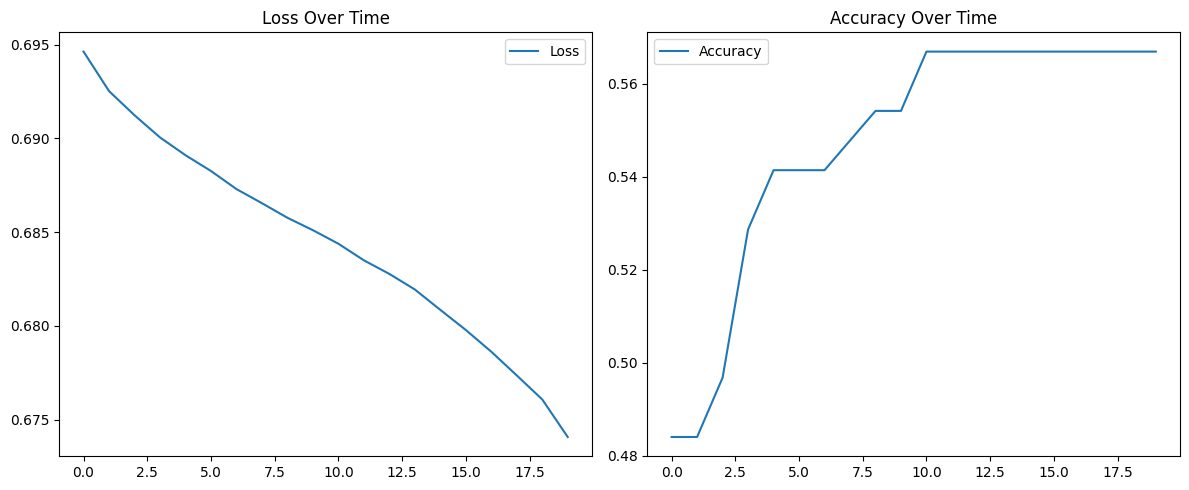

In [12]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


In [ ]:
# 🔧 Add code here

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(12, activation='relu'), # New Layer
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.4654 - loss: 0.6957 - val_accuracy: 0.5735 - val_loss: 0.6769
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4517 - loss: 0.7102 - val_accuracy: 0.5735 - val_loss: 0.6821
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5442 - loss: 0.6924 - val_accuracy: 0.5882 - val_loss: 0.6825
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5535 - loss: 0.6877 - val_accuracy: 0.5735 - val_loss: 0.6822
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5054 - loss: 0.6930 - val_accuracy: 0.5588 - val_loss: 0.6826
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5103 - loss: 0.6850 - val_accuracy: 0.5294 - val_loss: 0.6833
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4940 - loss: 0.6905 - val_accuracy: 0.5294 - val_loss: 0.6830
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5593 - loss: 0.6763 - val_accuracy: 0.5441 - val_loss: 0.

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Confusion Matrix:
 [[16 22]
 [ 9 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.42      0.51        38
           1       0.49      0.70      0.58        30

    accuracy                           0.54        68
   macro avg       0.56      0.56      0.54        68
weighted avg       0.57      0.54      0.54        68

Accuracy: 0.5441176470588235


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(12, activation='relu'), # New Layer
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=8, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4809 - loss: 0.6907 - val_accuracy: 0.5441 - val_loss: 0.6862
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5166 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6887
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4975 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6897
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5421 - loss: 0.6867 - val_accuracy: 0.4706 - val_loss: 0.6915
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5635 - loss: 0.6795 - val_accuracy: 0.4706 - val_loss: 0.6915
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5718 - loss: 0.6814 - val_accuracy: 0.4559 - val_loss: 0.6953
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6199 - loss: 0.6785 - val_accuracy: 0.4559 - val_loss: 0.6955
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6033 - loss: 0.6788 - val_accuracy: 0.4412 - va

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Combination 2: Batch size = 32, Layers = [16, 12, 8, 4] ---")
# Model
model_2 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(12, activation='relu'), # New Layer
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_2 = model_2.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_nn_2 = (model_2.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn_2))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn_2))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn_2))

--- Combination 2: Batch size = 32, Layers = [16, 12, 8, 4] ---
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5166 - loss: 0.6902 - val_accuracy: 0.4853 - val_loss: 0.6932
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5139 - loss: 0.6886 - val_accuracy: 0.5147 - val_loss: 0.6936
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5473 - loss: 0.6810 - val_accuracy: 0.5441 - val_loss: 0.6934
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5597 - loss: 0.6797 - val_accuracy: 0.5588 - val_loss: 0.6938
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5665 - loss: 0.6822 - val_accuracy: 0.5441 - val_loss: 0.6940
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5695 - loss: 0.6798 - val_accuracy: 0.5441 - val_loss: 0.6941
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5963 - loss: 0.6717 - val_accuracy: 0.5441 - val_loss: 0.6947
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5682 - loss: 0.6680 - val_accuracy: 0.5441 - val_loss: 0.6957
Epoch 9/20


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Combination 3: Fewer Layers (2 layers: 16, 8 units), Batch size = 16 ---")
# Model with 2 hidden layers
model_3 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  # Layer 1
    Dense(8, activation='relu'),  # Layer 2
    Dense(1, activation='sigmoid') # Output Layer
])

# Compile
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_3 = model_3.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn_3 = (model_3.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn_3))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn_3))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn_3))

--- Combination 3: Fewer Layers (2 layers: 16, 8 units), Batch size = 16 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5172 - loss: 0.6872 - val_accuracy: 0.6176 - val_loss: 0.6803
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5227 - loss: 0.6718 - val_accuracy: 0.6176 - val_loss: 0.6817
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5264 - loss: 0.6735 - val_accuracy: 0.6618 - val_loss: 0.6805
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5594 - loss: 0.6780 - val_accuracy: 0.6324 - val_loss: 0.6822
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5291 - loss: 0.6802 - val_accuracy: 0.6029 - val_loss: 0.6815
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5299 - loss: 0.6710 - val_accuracy: 0.6029 - val_loss: 0.6831
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5447 - loss: 0.6770 - val_accuracy: 0.6029 - val_loss: 0.6849
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5658 - loss: 0.6627 - val_accuracy: 0.6029 - 

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Combination 4: More Layers (6 layers: 32, 24, 16, 12, 8, 4 units), Batch size = 16 ---")
# Model with 6 hidden layers
model_4 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_svm.shape[1],)),  # Layer 1
    Dense(24, activation='relu'),  # Layer 2
    Dense(16, activation='relu'),  # Layer 3
    Dense(12, activation='relu'),  # Layer 4
    Dense(8, activation='relu'),   # Layer 5
    Dense(4, activation='relu'),   # Layer 6
    Dense(1, activation='sigmoid')  # Output Layer
])

# Compile
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_4 = model_4.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn_4 = (model_4.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn_4))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn_4))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn_4))

--- Combination 4: More Layers (6 layers: 32, 24, 16, 12, 8, 4 units), Batch size = 16 ---
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3930 - loss: 0.6944 - val_accuracy: 0.4853 - val_loss: 0.6909
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5073 - loss: 0.6918 - val_accuracy: 0.5294 - val_loss: 0.6911
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5297 - loss: 0.6918 - val_accuracy: 0.5147 - val_loss: 0.6899
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5691 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.6884
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5773 - loss: 0.6904 - val_accuracy: 0.4853 - val_loss: 0.6863
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6603 - loss: 0.6811 - val_accuracy: 0.5294 - val_loss: 0.6823
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6190 - loss: 0.6825 - val_accuracy: 0.5000 - val_loss: 0.6807
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6241 - loss: 0.6850 - val_accuracy: 0.4706 - val_loss: 0.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- Combination 5 with Dropout: Fewer Layers (2 layers: 16, 8 units), Batch size = 8 ---")
# Model with 2 hidden layers and Dropout
model_5 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  # Layer 1
    Dropout(0.2), # Dropout after first hidden layer
    Dense(8, activation='relu'),  # Layer 2
    Dropout(0.2), # Dropout after second hidden layer
    Dense(1, activation='sigmoid') # Output Layer
])

# Compile
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_5 = model_5.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=8, verbose=1)

# Predict and evaluate
y_pred_nn_5 = (model_5.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn_5))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn_5))
print("Accuracy: ", accuracy_score(y_test_svm, y_pred_nn_5))

--- Combination 5 with Dropout: Fewer Layers (2 layers: 16, 8 units), Batch size = 8 ---
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6255 - loss: 0.6543 - val_accuracy: 0.5147 - val_loss: 0.7102
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5767 - loss: 0.6930 - val_accuracy: 0.4853 - val_loss: 0.7119
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5386 - loss: 0.7151 - val_accuracy: 0.4559 - val_loss: 0.7123
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4967 - loss: 0.7120 - val_accuracy: 0.4412 - val_loss: 0.7135
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4584 - loss: 0.7148 - val_accuracy: 0.4118 - val_loss: 0.7139
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5222 - loss: 0.6779 - val_accuracy: 0.4118 - val_loss: 0.7147
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5169 - loss: 0.6971 - val_accuracy: 0.4118 - val_loss: 0.7157
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6038 - loss: 0.6631 - val_accuracy: 0.4118 - val_loss: 0.7157


### ✍️ Your Response: 🔧
1. Having 2 layers with 16 batches was the optimal for the accuracy of the model.

2. Dropout in fact did not help the model neither did anything benefical to the fitting of the model.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. My third neural network model perforrmed best on the dataset. It was not the result because of the underwhelming accuracy on the model.

2. Most of them seemed to be underfit because of the accuracy of the models being so low.

3. If I had to, I would recommend my third neural network model, although it needs some work. Because of the accuracy percentage and they could improve upon it.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_12_LastnameFirstname.ipynb"